In this post, I will use Boston Housing data set, the data set contains information about the housing values in suburbs of Boston.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns


In [2]:
#from sklearn.datasets import load_boston
boston = datasets.load_boston() 
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target, columns = ['price'])

In [3]:
df_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df_x.shape 

(506, 13)

We see that we have 506 observations and 13 attributes. The goal is to predict the price of the house using the features given. 

Feature name

In [5]:
print(df_x.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [6]:
df_x.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

convert df_bos.data into pandas data frame

In [7]:
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


13


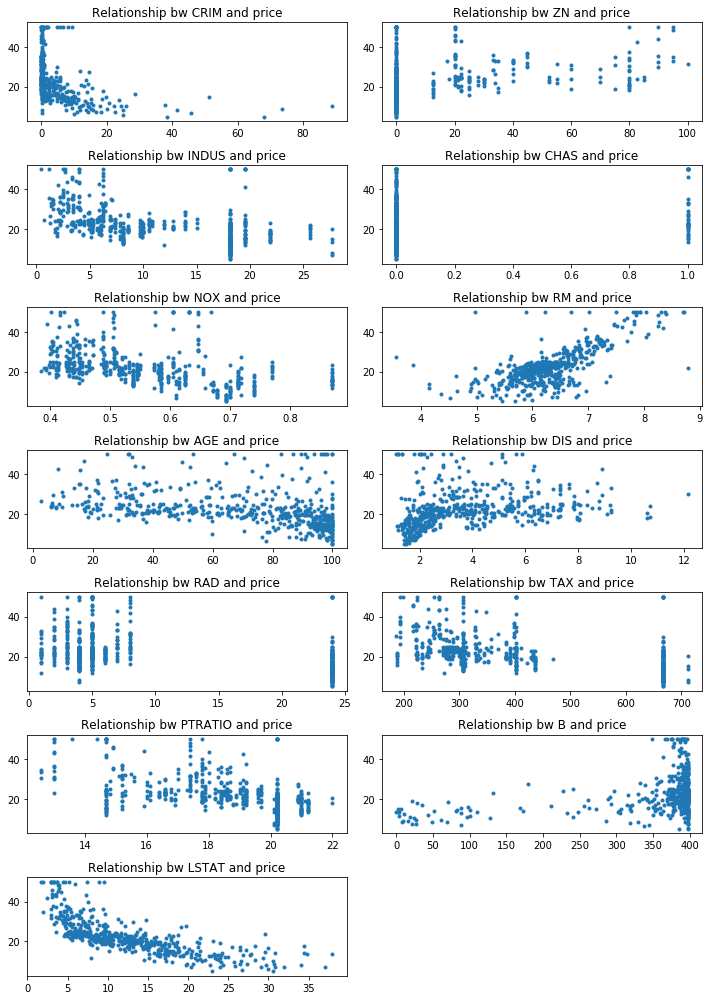

In [8]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(df_x[col],df_y,marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
plotFeatures(colnames,"Relationship bw %s and price")

These graphs gives a clear intuition of relationship of target variable with features. We can see that RM(Avg. rooms per dwelling) has very linear relationship with price.

Another option to see the relationship is to plot the correlation of features and target variable with each other using heatmap of seaborn.This is much more descriptive also.

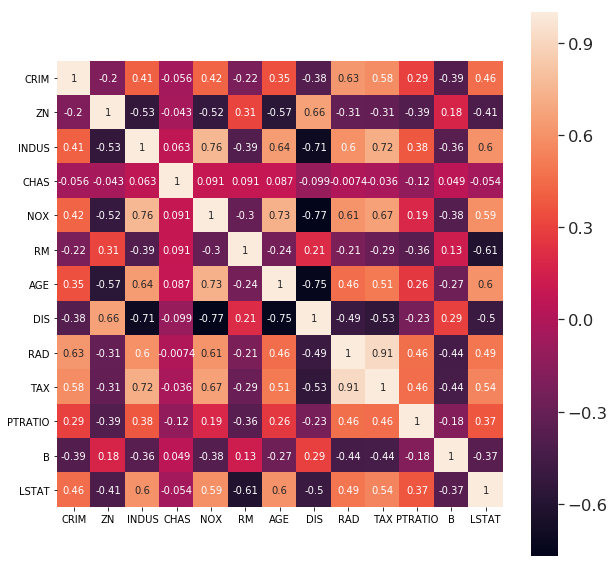

In [9]:
import seaborn as sns
fig = plt.subplots (figsize = (10,10))
sns.set (font_scale = 1.5)
sns.heatmap (df_x.corr (), square = True, cbar = True, annot = True, annot_kws = {'size': 10})
plt.show ()


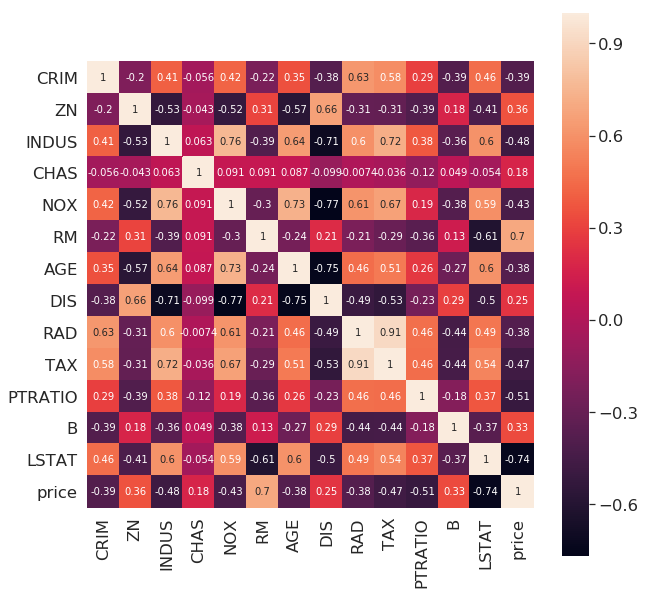

In [10]:
df = pd.concat([df_x, df_y],axis = 1,sort = True)
fig = plt.subplots (figsize = (10,10))
sns.set (font_scale = 1.5)
sns.heatmap (df.corr (), square = True, cbar = True, annot = True, annot_kws = {'size': 10})
plt.show ()

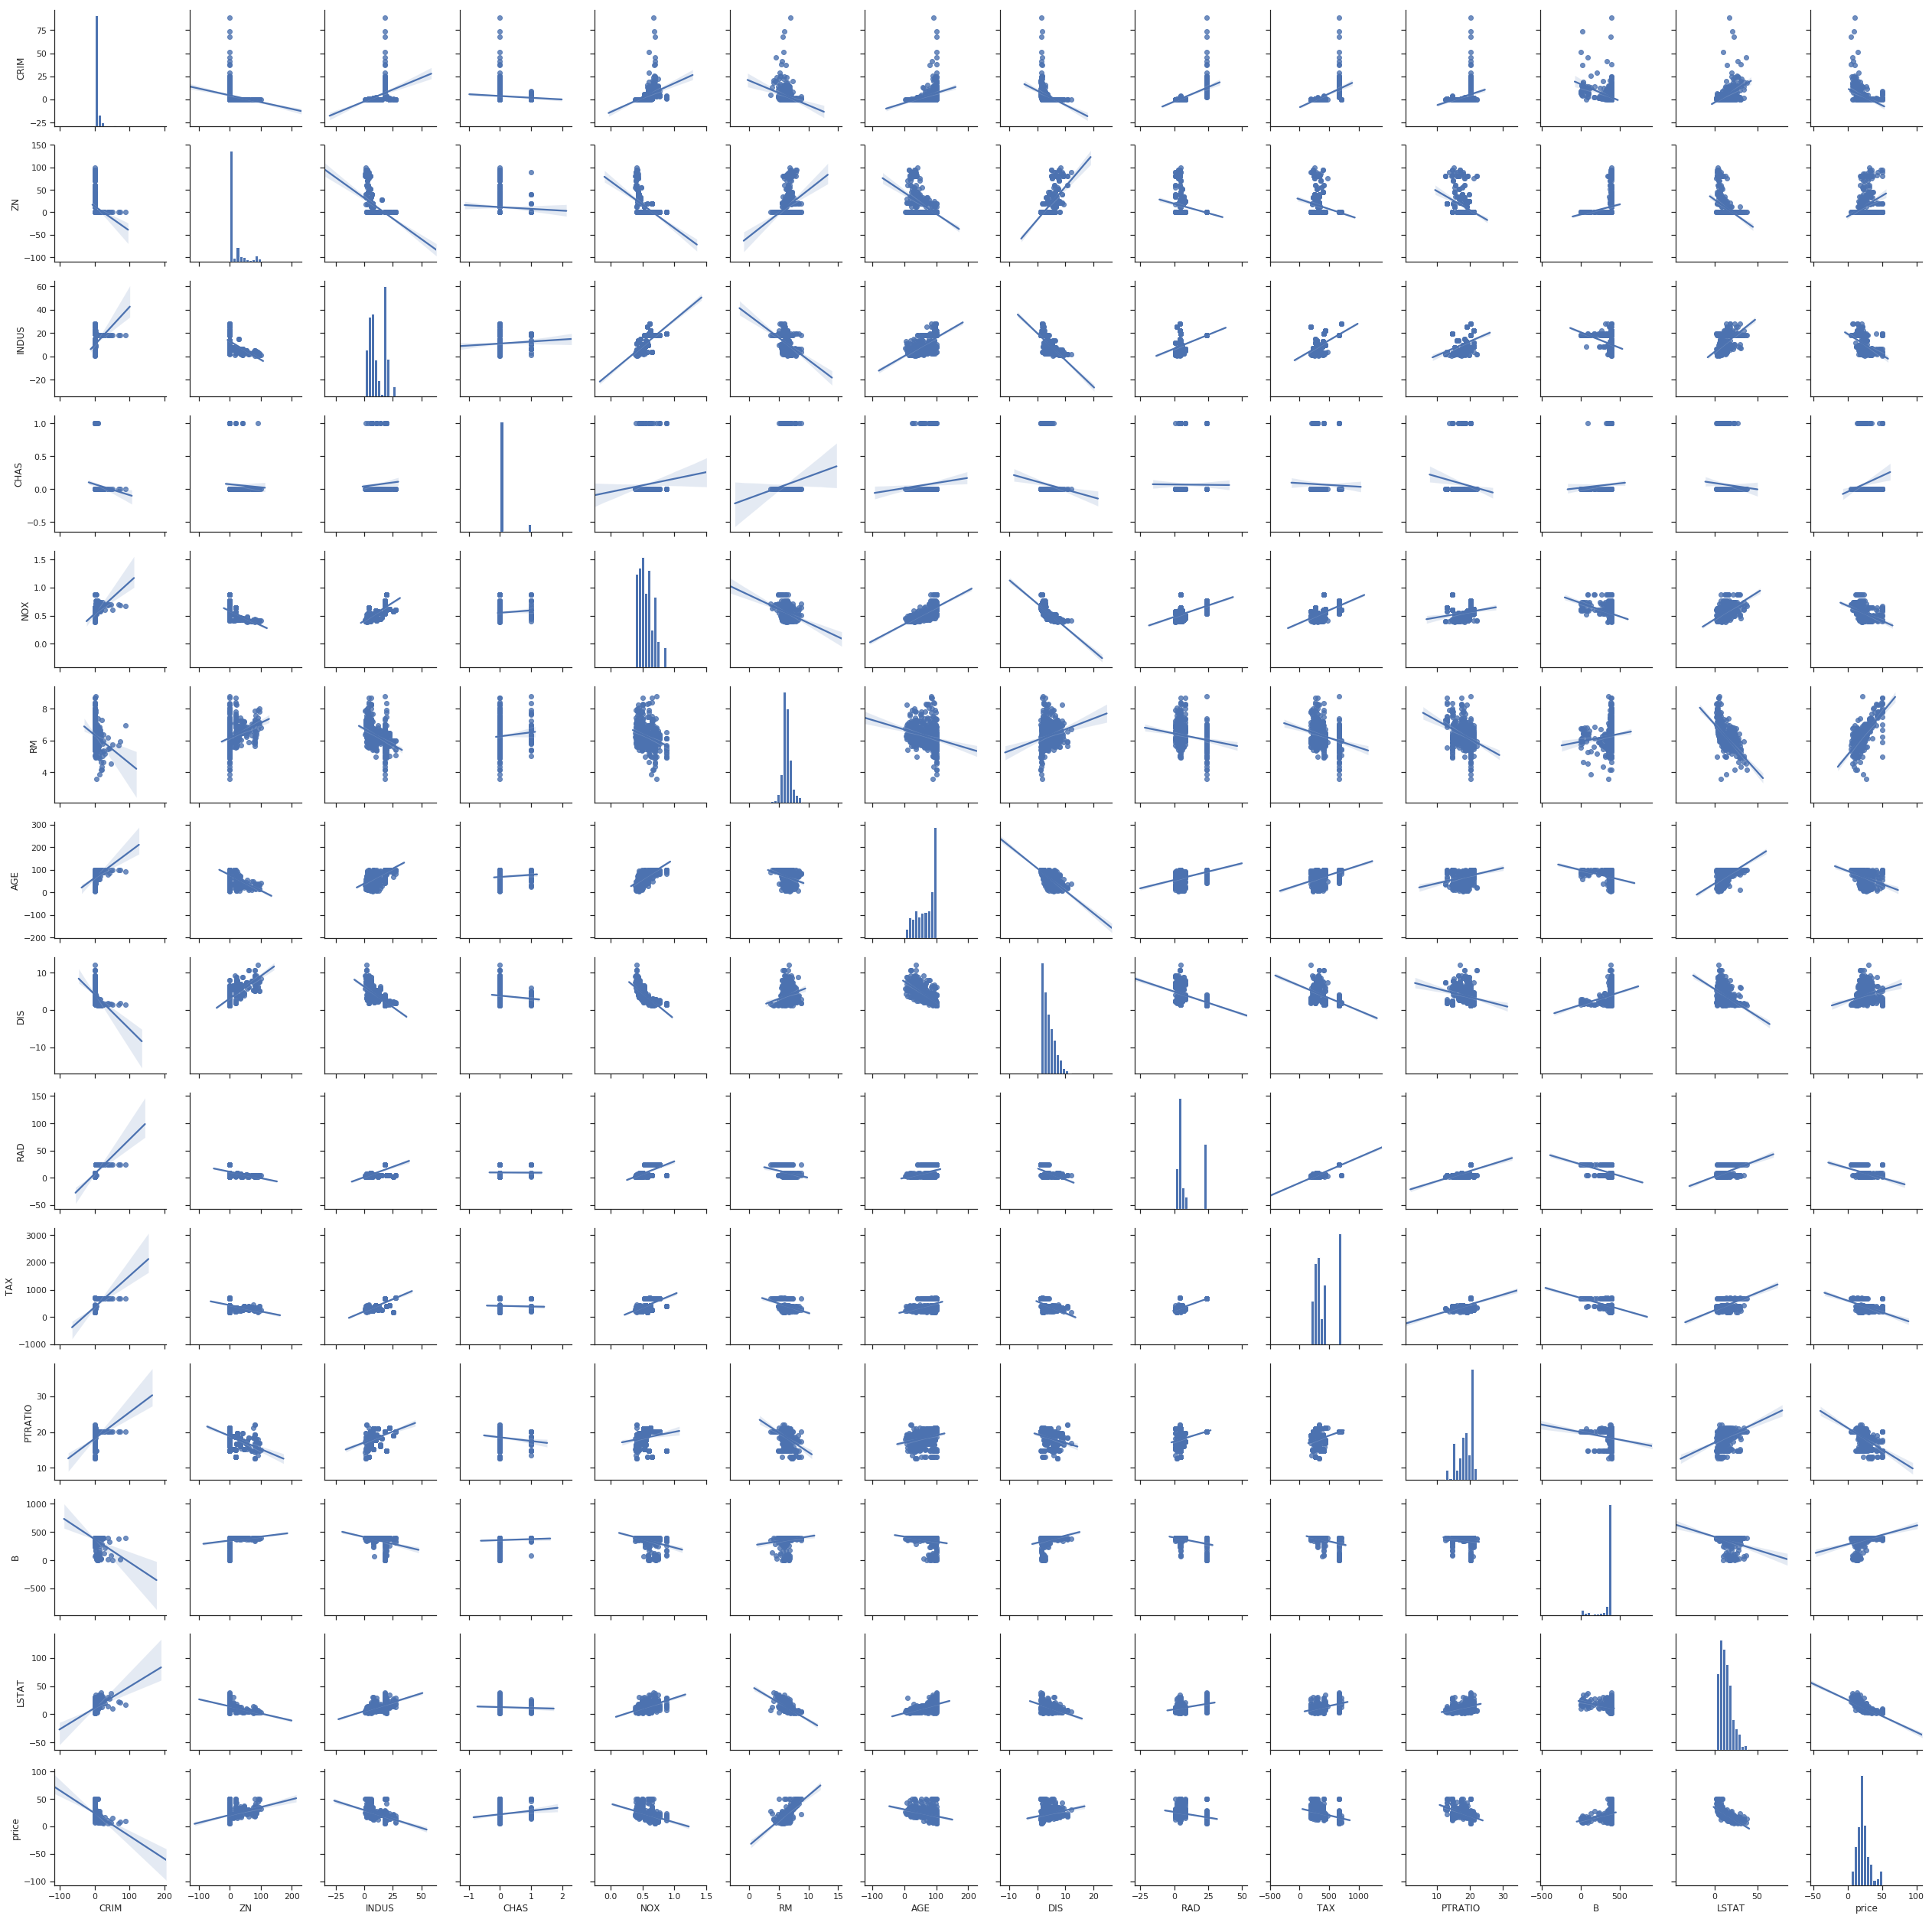

In [11]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,kind="reg")

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [13]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
138,0.24980,0.0,21.89,0.0,0.624,5.857,98.2,1.6686,4.0,437.0,21.2,392.04,21.32
251,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
256,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11


In [14]:
from sklearn.linear_model import LinearRegression  
linear_model = LinearRegression()  
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
# Intercept
print(linear_model.intercept_)

[35.55487454]


In [16]:
# The coefficients
print('Coefficients: \n', linear_model.coef_)


Coefficients: 
 [[-1.15966452e-01  4.71249231e-02  8.25980146e-03  3.23404531e+00
  -1.66865890e+01  3.88410651e+00 -1.08974442e-02 -1.54129540e+00
   2.93208309e-01 -1.34059383e-02 -9.06296429e-01  8.80823439e-03
  -4.57723846e-01]]


In [17]:
y_pred = linear_model.predict(X_test)

In [18]:
# Explained variance score: 1 is perfect  R^2  
print('Variance Score: %0.2f' % linear_model.score(X_train, y_train))

Variance Score: 0.74


In [19]:
# Adjusted R^2 
adjusted_r_squared = 1 - (1-linear_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adjusted_r_squared

0.7329085693717183

In [20]:
# Explained variance score: 1 is perfect 
print('Variance Score: %0.2f' % linear_model.score(X_test, y_test))

Variance Score: 0.73


In [21]:
from sklearn import metrics  
print('Mean Absolute Error:',  metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error: ',  metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:',  np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


##pd.DataFrame(zip(X.columns, linear_model.coef_), columns = ['features', 'estimatedCoefficients'])

Mean Absolute Error: 3.367790983796571
Mean Squared Error:  25.419587126821725
Root Mean Squared Error: 5.0417841214020385


In [22]:
linear_model.coef_[0].tolist()

[-0.11596645190829684,
 0.047124923133629704,
 0.0082598014625022,
 3.234045310301052,
 -16.68658901913393,
 3.884106514652021,
 -0.010897444228719508,
 -1.5412954044120084,
 0.2932083087544776,
 -0.013405938287264309,
 -0.9062964291148571,
 0.008808234386811938,
 -0.45772384582140574]

In [23]:
#To get the list of column names
names = [i for i in list(df_x)]
names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [24]:
pd.DataFrame(list((zip(names, linear_model.coef_[0].tolist()))), columns = ['names', 'Coefficients'])

,names,Coefficients
0,CRIM,-0.115966
1,ZN,0.047125
2,INDUS,0.008260
3,CHAS,3.234045
4,NOX,-16.686589
5,RM,3.884107
6,AGE,-0.010897
7,DIS,-1.541295
8,RAD,0.293208
9,TAX,-0.013406


As you can see from the data frame that there is a high correlation between RM and prices. Lets plot a scatter plot between True housing prices and True RM.

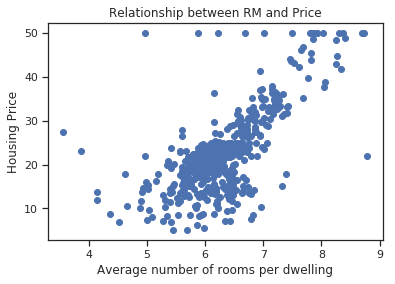

In [25]:
plt.scatter(df_x.RM, df_y)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title('Relationship between RM and Price')
plt.show()

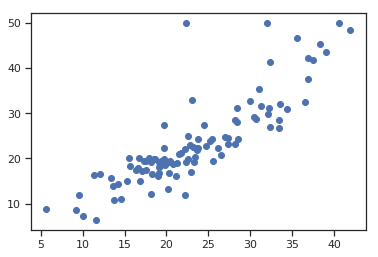

In [26]:
# plot of predicted and test 

plt.scatter(y_pred, y_test)

#### Residual Plots
Residual plots are a good way to visualize the errors in your data. If you have done a good job then your data should be randomly scattered around line zero. If you see structure in your data, that means your model is not capturing some thing. Maye be there is a interaction between 2 variables that you are not considering, or may be you are measuring time dependent data. If you get some structure in your data, you should go back to your model and check whether you are doing a good job with your parameters.


Text(0.5, 0, 'Fitted values')

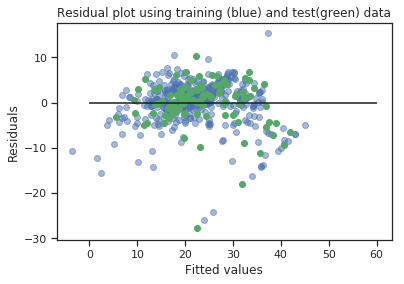

In [27]:
plt.scatter(linear_model.predict(X_train), linear_model.predict(X_train)-y_train, c= 'b', alpha = 0.5)
plt.scatter(linear_model.predict(X_test), linear_model.predict(X_test)-y_test, c= 'g')
plt.hlines(y = 0, xmin = 0, xmax = 60)
plt.title('Residual plot using training (blue) and test(green) data')
plt.ylabel('Residuals')
plt.xlabel('Fitted values')

In [28]:
## Finding p-values using statmodels

Xs = X_train.values
y = y_train.values

In [29]:
import statsmodels.api as sm 
X2 = sm.add_constant(Xs)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     86.07
Date:                Wed, 01 May 2019   Prob (F-statistic):          7.71e-106
Time:                        22:42:57   Log-Likelihood:                -1190.1
No. Observations:                 404   AIC:                             2408.
Df Residuals:                     390   BIC:                             2464.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5549      5.499      6.466      0.0

In [30]:
print("R-Squared:", est2.rsquared, " Adj R-Squared: ", est2.rsquared_adj)

R-Squared: 0.7415244219726307  Adj R-Squared:  0.7329085693717183


In [31]:
est2.pvalues

array([3.02067131e-10, 1.87977592e-03, 2.68369566e-03, 9.05866935e-01,
       1.48930074e-03, 6.84768922e-05, 3.29864989e-16, 4.60212101e-01,
       2.47004383e-11, 7.94179397e-05, 1.62938009e-03, 8.40888662e-10,
       3.35019278e-03, 7.34277577e-15])

In [32]:
# Compute R^2 and adjusted R^2 with formulas 
yhat = linear_model.predict(X_train)
SS_Residual = sum((np.asarray(y_train)-yhat)**2)
SS_Total = sum(((np.asarray(y_train))-np.mean(np.asarray(y_train)))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)


[0.74152442] [0.73290857]
